In [2]:
import pandas as pd
import numpy as np

In [3]:
file_path = "auto-mpg.csv"

data = pd.read_csv(file_path)

In [4]:
data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
#csv dataset error fix
for index, value in enumerate(data["horsepower"]):
        if value == "?":  #check if the value is "?"
            data.at[index, "horsepower"] = None  #replace for NaN
            data = data.dropna() #deletes lines that contain NaN
data["horsepower"] = pd.to_numeric(data["horsepower"], errors='coerce')

In [ ]:
#using sckit-learn to split the dataset
'''from sklearn.model_selection import train_test_split

X = data.iloc[:, 1:-1]
y = data.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)'''

'train, valid = train_test_split(data, test_size=0.2)\n\ny_train = train.iloc[:, 0] \ny_valid = valid.iloc[:, 0]\nX_train = train.iloc[:, 1:-1]\nX_valid = valid.iloc[:, 1:-1]'

In [5]:
#using pandas to split the dataset
train_data = data.sample(frac=0.8, random_state=42)  
valid_data = data.drop(train_data.index)   

X_train = train_data.iloc[:, 1:-1]
y_train = train_data.iloc[:, 0]

X_valid = valid_data.iloc[:, 1:-1]
y_valid = valid_data.iloc[:, 0]


In [19]:
#using sckit-learn to normalize input data
'''from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_normalized = scaler.fit_transform(X_train)

print(X_train_normalized)'''

'from sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\n\nX_train_normalized = scaler.fit_transform(X_train)\n\nprint(X_train_normalized)'

In [6]:
#using tensorflow to normalize input data
import tensorflow as tf

def norm(input_data):
    normalizer = tf.keras.layers.Normalization()
    normalizer.adapt(np.array(input_data))
    data_normalized = normalizer(np.array(input_data))
    return data_normalized

X_t = norm(X_train)
X_v = norm(X_valid)



In [7]:
#creation of a simple neural network with two hidden layers and the output layer with linear activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='linear'))

c:\Users\Bernardo Duarte\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
#configuring the model for training
model.compile(
    optimizer='rmsprop',
    loss='mse',
    loss_weights=None,
    metrics=['r2_score'],
    weighted_metrics=None,
    run_eagerly=False,
    steps_per_execution=1,
    jit_compile='auto',
    auto_scale_loss=True
)

In [99]:
#training the model
modelo = model.fit(
    X_t, 
    y_train, 
    validation_data=(X_v, y_valid),
    batch_size=32, 
    epochs=200
)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 586.3666 - r2_score: -8.7355 - val_loss: 626.8632 - val_r2_score: -10.2709
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 538.1009 - r2_score: -7.6159 - val_loss: 592.1361 - val_r2_score: -9.6465
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 509.4838 - r2_score: -7.4298 - val_loss: 552.6107 - val_r2_score: -8.9358
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 480.4484 - r2_score: -7.2291 - val_loss: 508.0374 - val_r2_score: -8.1344
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 421.6120 - r2_score: -5.8116 - val_loss: 459.6774 - val_r2_score: -7.2649
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 364.7068 - r2_score: -5.2025 - val_loss: 406.8871 - val_r2_score: -6.3157
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 329.9772 - r2_score: -4.7490 - val_loss: 352.1931 - val_r2_score: -5.3323
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 269.1827

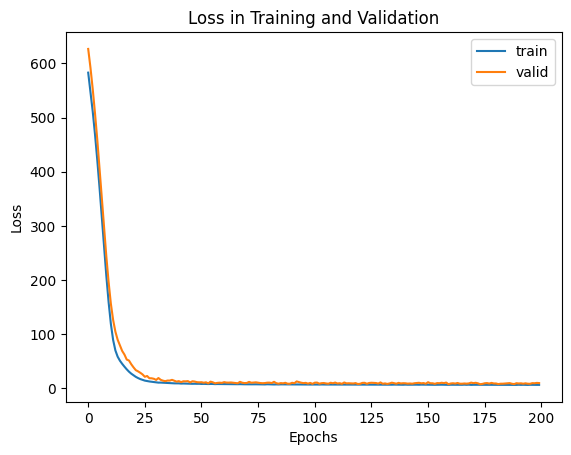

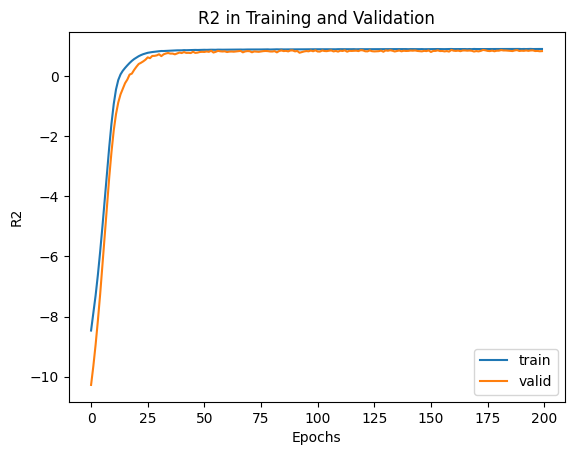

In [ ]:
import matplotlib.pyplot as plt


plt.plot(modelo.history['loss'], label='train')
plt.plot(modelo.history['val_loss'], label='valid')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss in Training and Validation')
plt.show()


if 'r2_score' in modelo.history:  # Verifica se foi usada a métrica R²
    plt.plot(modelo.history['r2_score'], label='train')
    plt.plot(modelo.history['val_r2_score'], label='valid')
    plt.xlabel('Epochs')
    plt.ylabel('R2')
    plt.legend()
    plt.title('R2 in Training and Validation')
    plt.show()